In [1]:
import random, string, statistics, math, numpy as np, matplotlib.pyplot as plt, time

In [2]:
import hybrid, core_one as c1, core_three as c3

/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# Hybrid Cryptography - Mathematical Programming Project
Owen Core, Toby Long, Jasmine Ngiam, Wendy Zhou

## *Contents:*


### [0 - Introduction](#0)
### [1 - Caesar and Vigenere ciphers (core 1)](#1)
#### [1.1 - Single Caesar shifts](#1.1)
#### [1.2 - Caesar Cipher](#1.2)
#### [1.3 - Vigenere Cipher](#1.3)
### [2 - Cracking the Caesar cipher with letter frequency analysis (core 2)](#2)
#### [2.1 - The process](#2.1)
#### [2.2 - Extracting text and finding frequencies](#2.2)
#### [2.3 - Cracking the cipher](#2.3)
#### [2.4 - Analysis of minimum ciphertext length for cracking Caesar cipher](#2.4)
### [3 - Testing the performance of the smallest_factor function (core 3)](#3)
#### [3.1 - The Assumption](#3.1)
#### [3.2 - The Process](#3.2)
#### [3.3 - Results file](#3.3)
#### [3.4 - Conclusion](#3.4)
### [4 - Hybrid system V1 (core 4)](#4)
#### [4.1 - Hybrid process](#4.1)
### [5 - Cracking the Vigenere cipher with Kasiski analysis (extension 8)](#5)
#### [5.1 - The process](#5.1)
#### [5.2 - Finding the key length](#5.2)
#### [5.3 - Problems with finding key lengths](#5.3)
#### [5.4 - Kasiski crack](#5.4)
#### [5.5 - Limitations of Kasiski analysis](#5.5)
#### [5.6 - Hybrid system V1 vulnerabilities](#5.6)
### [6 - Bigram encoding to prevent Kasiski analysis (core 5)](#6)
#### [6.1 - Motivation](#6.1)
#### [6.2 - Allocating bigrams](#6.2)
#### [6.3 - Encoding/Decoding](#6.3)
#### [6.4 - Hybrid system V2](#6.4)
#### [6.5 - Evaluation of improved hybrid system](#6.5)
### [7 - Extra characters (extension 6)](#7)
#### [7.1 - Motivation](#7.1)
#### [7.2 - Function adjustments](#7.2)
#### [7.3 - Hybrid system V3](#7.3)
### [8 - Conclusion](#8)
### [9 - Glossary](#9)
### [10 - Bibliography](#10)

## Introduction <a id='0'></a>

In this project we explore various techniques for enciphering and **encoding** texts, and **cracking** ciphered messages. We start by writing code to perform Caesar shifts which is used as the basis for our Caesar and Vigenere **ciphers**. Then we explore the RSA protocol and put together a first version of a **hybrid encryption** system. After testing and developing techniques to crack the ciphers, the weaknesses of the system are exposed. Hence, an attempt to patch the system by encoding our **plaintexts** before encryption is made. Finally, we improve our system by allowing it to handle more complicated texts with white space, digits and punctuation.

## 1 - Caesar and Vigenere ciphers <a id='1'></a>

In this section we want to implement functions to perform Caesar and Vigenere encryption and decryption. A Caesar cipher takes each letter of your plaintext - your text or message before encryption - and shifts it $n$ spaces along the alphabet [1]. 

For example, (working with the lowercase alphabet) shifting 'a' by $n=3$ returns 'd' and shifting 'z' by $n=2$ gives 'b'.

### 1.1 - Single Caesar Shifts <a id='1.1'></a>

First we start with two functions that perform a Caesar shift of a single letter and the inverse of that shift.

In [3]:
def caesar_shift(letter, shift, alphabet): 
    """Caesar shifts a single character.
    OUTPUT: 'shifted_character'."""
    
    new_index = (alphabet.find(letter) + shift) % len(alphabet)   
    #finds the index of the character and shifts the index
    new_letter = alphabet[new_index]   
    #finds the character corresponding to the new index
    
    return new_letter   #returns the new letter

    
def caesar_invert_shift(letter, shift, alphabet): 
    """Inverts Caesar shift of single character.
    OUTPUT: 'inverted_shifted_character'."""
    
    inverse_shift = -shift   #takes minus shift and applies to caesar_shift
    new_letter = caesar_shift(letter, inverse_shift, alphabet)
    
    return new_letter   #returns new letter

##### Testing

To check all seems to be working, we perform some quick tests:

In [4]:
alph = string.ascii_letters   #import a string of upper and lower case alphabetical letters we wish to use

for _ in range(100):
    random_letter = alph[random.randint(0, 51)]
    random_shift = random.randint(0, 100)
    assert caesar_invert_shift(caesar_shift(random_letter, random_shift, alph), random_shift, alph) == random_letter
    # Checking the invert shift of the shift takes you back to the original letter
    
for i in range(22, 30):
    print("A shift of 'a' by " + str(i) + " gives '" + str(caesar_shift('a', i, alph)) + "'")

A shift of 'a' by 22 gives 'w'
A shift of 'a' by 23 gives 'x'
A shift of 'a' by 24 gives 'y'
A shift of 'a' by 25 gives 'z'
A shift of 'a' by 26 gives 'A'
A shift of 'a' by 27 gives 'B'
A shift of 'a' by 28 gives 'C'
A shift of 'a' by 29 gives 'D'


We can now use this single letter shift to encipher a whole text.

### 1.2 - Caesar Cipher <a id='1.2'></a>

The Caesar cipher applies the same Caesar shift to every letter of the plaintext. See the following two functions for encrypting and decrypting messages with the Caesar cipher.

In [5]:
def caesar_encipher(plaintext, shift, alphabet): 
    """Caesar enciphers a whole message.
    OUTPUT: 'enciphered_message'."""
    
    enc_list = [caesar_shift(let, shift, alphabet) for let in plaintext]   
    #creates list of caesar shifted letters
    enc_string = ''.join(enc_list)   #turns list into a string

    return enc_string


def caesar_decipher(ciphertext, shift, alphabet): 
    """Caesar deciphers a whole message.
    OUTPUT: 'deciphered_message'."""
    
    dec_list = [caesar_invert_shift(let, shift, alphabet) for let in ciphertext]   
    #creates list of caesar shifted letters
    dec_string = ''.join(dec_list)   #turns list into a string

    return dec_string

##### Testing

Firstly, using some examples we test and print the results to demonstrate the process.

Here we use some functions that will be explained later on in this document (url_to_text and extract_text). For now, we import them from a saved file (hybrid.py).

In [6]:
# First we can use the same test from before on the single letter 'a' and we should get the same result...
for i in range(23, 29):
    print("A shift of 'a' by " + str(i) + " gives '" + str(caesar_encipher('a', i, alph)) + "'")
    # Which we do.

    
# Short message testing - quick check all is working
plaintext = "SecretDemoMessage"
ciphertext = caesar_encipher(plaintext, 5, alph)
deciphered = caesar_decipher(ciphertext, 5, alph)

print("\n \nWe can perform a test on a short message here.\n \n\tOur plaintext is: ", plaintext,
      "\n\tThe ciphertext is: ", ciphertext, "\n\tWith shift: 5 \n\tAnd the deciphered text is: ", deciphered)
assert plaintext == deciphered   #check the decipher of the enciphered text gets us back to the original message


# More short message testing - randomly generated plaintexts
for _ in range(1000):
    
    plaintext_list = [alph[random.randint(0, 51)] for _ in range(random.randint(1, 100))]
    plaintext = ""
    for letter in plaintext_list:
        plaintext += letter
    
    random_shift = random.randint(1, 51)
    
    ciphertext = caesar_encipher(plaintext, random_shift, alph)
    deciphered = caesar_decipher(ciphertext,random_shift, alph)

    assert plaintext == deciphered
   
   
    
# Long text testing - example
Emma_raw_text = hybrid.url_to_text_utf8("https://raw.githubusercontent.com/cmh42/hc/main/message_emma.txt")
    #importing the raw text from url
Emma_extracted = hybrid.extract_text(Emma_raw_text, alph)
    #extracts only the characters from the text that are in alph
    
# Emma encryption/decryption     
print("\n\nWe have " + str(len(Emma_extracted)) +
      " characters of the book 'Emma'.\nWe will encrypt and then decrypt the whole book to test our functions.\n")
print("\tThe first 50 characters of the book are as follows:\n\t" + Emma_extracted[:50] + "...")

#now we encrypt and decrypt the book
random_shift = random.randint(1, 100)
encrypted_Emma = caesar_encipher(Emma_extracted, random_shift, alph)
decrypted_Emma = caesar_decipher(encrypted_Emma, random_shift, alph)

#and present the results to check correctness
print("\n\tThe first 50 characters after encryption are: \n\t" + encrypted_Emma[:50] + "...")
print("\n\tThe first 50 characters after decryption are: \n\t" + decrypted_Emma[:50] + "...")
assert Emma_extracted == decrypted_Emma   #shows we got back exactly the original text after encryption/decryption

A shift of 'a' by 23 gives 'x'
A shift of 'a' by 24 gives 'y'
A shift of 'a' by 25 gives 'z'
A shift of 'a' by 26 gives 'A'
A shift of 'a' by 27 gives 'B'
A shift of 'a' by 28 gives 'C'

 
We can perform a test on a short message here.
 
	Our plaintext is:  SecretDemoMessage 
	The ciphertext is:  XjhwjyIjrtRjxxflj 
	With shift: 5 
	And the deciphered text is:  SecretDemoMessage


We have 13824 characters of the book 'Emma'.
We will encrypt and then decrypt the whole book to test our functions.

	The first 50 characters of the book are as follows:
	EmmaWoodhousehandsomecleverandrichwithacomfortable...

	The first 50 characters after encryption are: 
	mUUIEWWLPWcaMPIVLaWUMKTMdMZIVLZQKPeQbPIKWUNWZbIJTM...

	The first 50 characters after decryption are: 
	EmmaWoodhousehandsomecleverandrichwithacomfortable...


The above examples all seemed to work with the **ciphertext** being unreadable and the **deciphered text** returning exactly back to the plaintext as required.

The following code takes short randomly generated messages and checks they are returned to the plaintext after encryption/decryption and it then encrypts and decrypts all six of the example texts provided. 

In [7]:
# Short message testing - randomly generated plaintexts
for _ in range(1000):
    
    plaintext_list = [alph[random.randint(0, 51)] for _ in range(random.randint(1, 100))]
    #generate random plaintexts
    plaintext = ""
    for letter in plaintext_list:
        plaintext += letter
    
    random_shift = random.randint(1, 100)   #generates random shifts
    
    ciphertext = caesar_encipher(plaintext, random_shift, alph)   #enciphers
    deciphered = caesar_decipher(ciphertext,random_shift, alph)   #deciphers

    assert plaintext == deciphered

print("Short message testing passed!")
    

# Long text testing - thourough testing
list_texts = ["https://raw.githubusercontent.com/cmh42/hc/main/message_emma.txt",
              "https://raw.githubusercontent.com/cmh42/hc/main/message_heart_of_darkness.txt",
              "https://raw.githubusercontent.com/cmh42/hc/main/message_moby_dick.txt",
              "https://raw.githubusercontent.com/cmh42/hc/main/message_tomorrows_tangle.txt",
              "https://raw.githubusercontent.com/cmh42/hc/main/message_treasure_island.txt",
              "https://raw.githubusercontent.com/cmh42/hc/main/message_wuthering_heights.txt"]
            #list of text url's    
    
# Test by enciphering and deciphering each of our long texts:
for text in list_texts:
    random_shift = random.randint(1, 100)
    extracted_text = hybrid.extract_text(hybrid.url_to_text_utf8(text), alph)
    ciphertext = caesar_encipher(extracted_text, random_shift, alph)
    deciphered = caesar_decipher(ciphertext, random_shift, alph)
    assert extracted_text == deciphered
    #This may take a little bit of time...
 
print("\nLong text testing passed!")

Short message testing passed!

Long text testing passed!


### 1.3 - Vigenere Cipher<a id='1.3'></a>

The Vigenere cipher works similarly to the Caesar cipher. Again, each letter is Caesar shifted, however, the shift is different for each letter and depends on a Vigenere key. The key is another string of characters and is repeated so that it matches the length of the plaintext. For each letter of the message, we use the index of the corresponding letter of the key as the $n$ shift value. decryption works similarly, using the key to determine by which value each letter must be inversely shifted [2].

Below are the functions to encipher/decipher using the Vigenere approach.

In [8]:
def vigenere_encipher(plaintext, alphabet, key_length = 5):
    """Vigenere enciphers a message string.
    OUTPUT: ('enciphered message', 'key')."""
    
    # Want to generate a random key of length less than or equal to the message
    #select the length of the random key... (optimal length is long as length of the message)
    key = ''.join(random.choice(alphabet) for i in range(key_length))   
    #generate the random key using characters from 'alphabet'
    
    ciphertext = ""   #create empty string
    for i in range(len(plaintext)):
        shift = alphabet.find(key[i % len(key)])   #find Caesar shift using key index
        ciphertext += caesar_shift(plaintext[i], shift, alphabet)   #Caesar shift the letter 
    
    return ciphertext, key


def vigenere_decipher(ciphertext, key, alphabet):
    """Vigenere deciphers a message string.
    OUTPUT: 'deciphered message'."""
    
    plaintext = ""   #create empty string
    for i in range(len(ciphertext)):
        shift = alphabet.find(key[i % len(key)])   #find Caesar shift
        plaintext += caesar_invert_shift(ciphertext[i], shift, alphabet)   #inverse the Caesar shift
        
    return plaintext

##### Testing

We apply similar tests as for Caesar cipher above.

In [9]:
# Short message testing - quick check all is working
plaintext = "SecretDemoMessage"
ciphertext, key = vigenere_encipher(plaintext, alph)   #will generate a key of length 5 by default
deciphered = vigenere_decipher(ciphertext, key, alph)

print("We can perform a test on a short message here.\n \n\tOur plaintext is: ", plaintext,
      "\n\tThe ciphertext is: ", ciphertext, "\n\tThe Vigenere key is: ", key, 
      "\n\tAnd the deciphered text is: ", deciphered)
assert plaintext == deciphered   #check the decipher of the enciphered text gets us back to the original message


# Long message testing - thourough testing
Mobey_raw_text = hybrid.url_to_text_utf8("https://raw.githubusercontent.com/cmh42/hc/main/message_moby_dick.txt")
    #importing the raw text from url
Mobey_extracted = hybrid.extract_text(Mobey_raw_text, alph)
    #extracts only the characters from the text that are in alph

# Mobey Dick encryption/decryption
print("\n\nWe have " + str(len(Mobey_extracted)) +
      " characters of the book 'Mobey Dick'.\nWe will encrypt and then decrypt the whole book to test our functions.\n")
print("\tThe first 50 characters of the book are as follows:\n\t" + Mobey_extracted[:50] + "...")

#now we encrypt and decrypt the book
encrypted_Mobey, key = vigenere_encipher(Mobey_extracted, alph)
decrypted_Mobey = vigenere_decipher(encrypted_Mobey, key, alph)

#and present the results to check correctness
print("\n\tThe first 50 characters after encryption are: \n\t" + encrypted_Mobey[:50] + "...")
print("\n\tThe first 50 characters after decryption are: \n\t" + decrypted_Mobey[:50] + "...")
assert Mobey_extracted == decrypted_Mobey

We can perform a test on a short message here.
 
	Our plaintext is:  SecretDemoMessage 
	The ciphertext is:  hDeayIcgVIbDubuvD 
	The Vigenere key is:  pzcJu 
	And the deciphered text is:  SecretDemoMessage


We have 9637 characters of the book 'Mobey Dick'.
We will encrypt and then decrypt the whole book to test our functions.

	The first 50 characters of the book are as follows:
	CHAPTERLoomingsCallmeIshmaelSomeyearsagonevermindh...

	The first 50 characters after encryption are: 
	wmTWcywevxgNGnBwFEsvYnLovUJEZxgJRljlXtnxhJOlAgNGkq...

	The first 50 characters after decryption are: 
	CHAPTERLoomingsCallmeIshmaelSomeyearsagonevermindh...


In [10]:
# Short message testing - randomly generated plaintexts
for _ in range(1000):
    
    plaintext_list = [alph[random.randint(0, 51)] for _ in range(random.randint(1, 100))]
    plaintext = ""
    for letter in plaintext_list:
        plaintext += letter   #created random plaintext 'message' (string of random characters)
    
    key_length = random.randint(1, 100)   #test different key lengths
    
    ciphertext, key = vigenere_encipher(plaintext, alph, key_length)   #enciphered 
    deciphered = vigenere_decipher(ciphertext, key, alph)   #deciphered

    assert plaintext == deciphered

print("Short message testing passed!")


# Long text testing - using the long texts from before
for text in list_texts:
    key_length = random.randint(1, 200)
    extracted_text = hybrid.extract_text(hybrid.url_to_text_utf8(text), alph)
    ciphertext, key = vigenere_encipher(extracted_text, alph, key_length)
    deciphered = vigenere_decipher(ciphertext, key, alph)
    assert extracted_text == deciphered
    #This may take a little bit of time...
 
print("\nLong text testing passed!")

Short message testing passed!

Long text testing passed!


We have now established functions that can reliably apply and decript the Caesar and Vigenere ciphers. The Vigenere is the first main building block of the hybrid system we aim to develope. We notice, however, that it is simply constructed from Caesar shifts and so in the next section we explore the security of the Caesar cipher. This has implications on the security of the Vigenere cipher, as we will see later on. 

## 2 - Cracking the Caesar cipher with letter frequency analysis <a id='2'></a>

### 2.1 - The process<a id='2.1'></a>

In this section we want to use the frequencies of each letter in the Enlgish language to find the $n$ shift of the Caesar cipher. To do this we find the frequencies of letters in the ciphertext and compare them to the known frequencies of letters in the English language. By doing this we can match up similar frequencies (the two highest, say) and use this to calculate the shift between those letters. Once we have the shift between two letters, the whole message can be deciphered using the caesar_decipher function [3].

### 2.2 - Extracting text and finding frequencies <a id='2.2'></a>

The function character_freq takes a text (be it an entire novel or a ciphered message) and creates a dictionary of each letter of the alphabet as the keys and the frequency of that letter in the text as the value. 

In [11]:
def url_to_text_utf8(url):
    '''Given a url for a text that is 'utf-8' encoded
    this function returns that text.'''
    
    response = requests.get(url)
    response.encoding = 'utf-8-sig'
    
    return response.text


def extract_text(text, alphabet):
    """Extracts the wanted characters from a text into a string.
    OUTPUT: 'extracted text'."""
    
    extracted = ""
    for let in text:   #cycle through eac letter in text
        if let in alphabet:   #check if its in alph
            extracted += let   #if it is, add to the string
    
    return extracted


def character_freq(text, alphabet, sort = False):
    """Takes a large text and characters of interest as input and returns
    a sorted dictionary of frequencies of the characters of interest in that text.
    OUTPUT: sorted dictionary of frequencies."""
    
    text = extract_text(text, alphabet)
    
    freq = []
    for let in alphabet:     #find the frequencies and append to a list
        count_i = text.count(let)   #count how many times that letter appears in the text
        freq.append(count_i/len(text))   #add to list
    
    freqdict = {}   
    for i in range(len(alphabet)):   #add frequencies to a dictionary
        freqdict.update({alphabet[i]: freq[i]})
    
    if sort == True:
        return sorted(freqdict.items(), key=lambda x:x[1])
    else:
        return freqdict

Now we need to import as many large texts as possible to create the most accurate dictionary of English language frequencies we can.

In [12]:
# recall, list_texts from earlier testing cells

big_text = ""
for text in list_texts:
    big_text += hybrid.extract_text(hybrid.url_to_text_utf8(text), alph)
    #extract the content and append all texts together
    
ENG_FREQ = character_freq(big_text, alph, sort = True)   #dictionaries of english language frequencies
ENG_FREQ_UNSORT = character_freq(big_text, alph, sort = False)   #unsorted

print("Here we have the 3 most common letters in the English language:\n", ENG_FREQ[-3:])

Here we have the 3 most common letters in the English language:
 [('a', 0.08103237690967703), ('t', 0.08781010351801054), ('e', 0.12538293654766433)]


Now we define a funtion to find the shift between two letters and then we can construct a function that will crack the Caesar cipher.

### 2.3 - Cracking the cipher<a id='2.3'></a>

Below we have a function crack_caesar which uses the process of letter frequency analysis described above to find the shift and decipher the ciphertext. An option is implemented which returns three attempted deciphers using the top three most common letters in the ciphertext to calculate the potential Caesar shifts. This may be useful if reviewing the results by hand as it improves the chances of finding the right decipher.

In [13]:
def find_shift(original_letter, new_letter, alphabet):
    """Finds the Ceasar shift given a letter from before and after shift.
    OUTPUT: shift."""
    
    shift = alphabet.index(new_letter) - alphabet.index(original_letter)   #difference of letter indexes
    
    return shift


def crack_caesar(ciphertext, alphabet, three_attempts = False):
    """Takes a Caesar encoded message and cracks it using letter
    frequency analysis without knowledge of the shift. Option to
    print 1 attempted crack or 3.
    OUTPUT: prints 1 or 3 attempted Caesar cracks."""
    
    global ENG_FREQ   
    cipher_freq = character_freq(ciphertext, alphabet, True)  #create dictionary for freq of letters in ciphertext
    
    length = len(alphabet)
    
    if three_attempts == True: 
        plaintext_tup = []
        shifts = []
        for i in range(3):
            shift = find_shift(str((ENG_FREQ[length-1])[0]), str((cipher_freq[length-1-i])[0]), alphabet)   
            #find the shift according to 3 most freq letters in ciphertext
            plaintext = caesar_decipher(ciphertext, shift, alphabet)   #decipher using this shift
            plaintext_tup.append(plaintext)
            shifts.append(shift)
        
        return tuple(plaintext_tup), shifts
    
    else:
        shift = find_shift(str((ENG_FREQ[length-1])[0]), str((cipher_freq[length-1])[0]), alphabet)
        #compare the most freq characters from ciphertext and ENGLISH
        plaintext = caesar_decipher(ciphertext, shift, alphabet)
        
        return plaintext, shift

##### Testing

In [14]:
# Test by enciphering each of our long texts and then using crack_caesar to decipher them:

for text in list_texts:
    random_shift = random.randint(1, 100)
    extracted_text = hybrid.extract_text(hybrid.url_to_text_utf8(text), alph)
    ciphertext = caesar_encipher(extracted_text, random_shift, alph)
    cracked, _ = crack_caesar(ciphertext, alph, False)
    assert extracted_text == cracked
    #This may take a little bit of time...
    
print("Long text testing complete!")

Long text testing complete!


Note that using randomly generated plaintext messages here wouldn't give the crack_caesar function realistic letter frequencies to compare to those known, and thus crack_caesar would not affectively decipher the messages.

### 2.4 - Analysis of minimum ciphertext length for cracking Caesar cipher<a id='2.4'></a>

Here we perform some tests and analysis of our crack_caesar function to determine how long a ciphertext message must be to ensure the crack_caesar function works *most* of the time.

In [15]:
# recall, list_texts from earlier testing cells
def test_length_dependence(three_attempts = False):
    """This function tests how many texts out of 6 fail to be cracked
    when different lengths of text are used (10 - 800 characters).
    OUTPUT: [number of fails], [string lengths]"""
    
    string_lengths = [10*n for n in range(1, 81)]   #list of string lengths from 10 to 800
    number_fails = []
    for length in string_lengths:
        count = 0   #count number of fails at each string length

        for url in list_texts:   #cycle through texts
            used_text = hybrid.extract_text(hybrid.url_to_text_utf8(url), alph)[:length]

            random_shift = random.randint(1, 100)   #randomise shift each time

            ciphertext = caesar_encipher(used_text, random_shift, alph)   #encipher
            cracked, _ = crack_caesar(ciphertext, alph, three_attempts)   #crack (3 or 1 attempts)

            if used_text not in cracked:   #check if deciphered correctly 
                count += 1
        number_fails.append(count) 
        
    return number_fails, string_lengths

number_fails_three, string_lengths = test_length_dependence(three_attempts = True)
number_fails, _ = test_length_dependence(three_attempts = False)

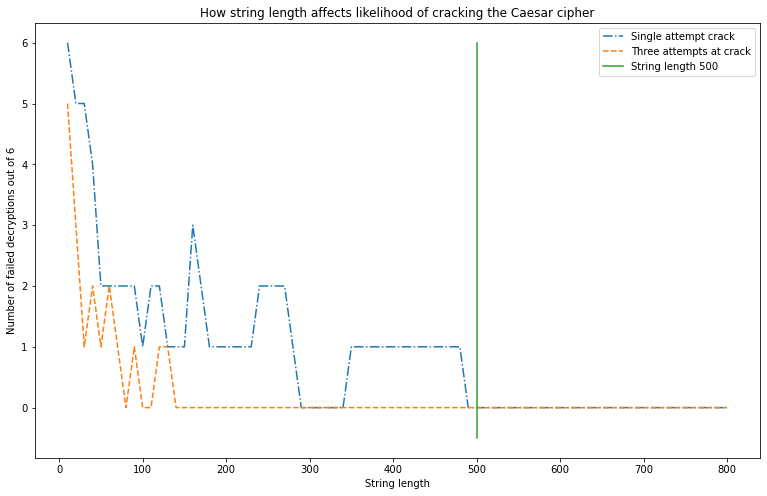

In [16]:
plt.figure(figsize=(13, 8))

plt.plot(string_lengths, number_fails, "-.", label = "Single attempt crack")
plt.plot(string_lengths, number_fails_three, "--", label = "Three attempts at crack")
plt.plot([500, 500], [-0.5, 6], label = "String length 500")
plt.legend()

plt.title("How string length affects likelihood of cracking the Caesar cipher")
plt.xlabel("String length")
plt.ylabel("Number of failed decryptions out of 6")
plt.show()

Looking at the graph, we can see that the crack_caesar function cracks every text of length over around 500 characters. 

Note that with only 6 different texts, this data may be fairly unreliable. Ideally we would have many more English texts to test against (or alternatively, we could take strings starting from different places in the example texts).

In this section we have shown how the Caesar cipher can easily be broken to reveal the original plaintext. As we see in section 5, this function is used in cracking the Vigenere cipher too. At the end of this section, we did some analysis on what string lengths can be deciphered using out crack_caesar function. This is helpful in knowing roughly what length messages are safe using this cipher, and it translates to the security of the Vigenere cipher also, as we will see in due course. 

## 3 - Testing the performance of the smallest_factor function<a id='3'></a>

### 3.1 - Motivation <a id='3.1'></a>
In section 4 we will use RSA encryption to add a further layer of security to the Vigenere cipher. Before we do this we test the difficulty of breaking the RSA method. RSA encryption works on the premise that it is very difficult to factorise a large number $N$, where $N = p*q$ for two prime numbers $p,q$ [4].

### 3.2 - The Process<a id='3.2'></a>
To test this we will generate pairs of random prime numbers $p$ and $q$, each time increasing their bit length (starting from 16-bit) and compute $N = p*q$. Then, with $N$ as the input parameter, we run the smallest_factor function and measure the average computation time using the %timeit function. i.e.,  For $l = 16$, and $k = l, l+1, l+2,...$, we factorise $N = p*q$ for $k$-bit primes $p, q$ and record how long it took. After collecting some data, we can extrapolate it to predict how long it would take to factorise larger values of $N$ and decide when this technique of deciphering RSA encripted messages becomes unfeasable. 

### 3.3 - Results <a id='3.3'></a>
Below are the algorithms to test the performance of smallest_factor function and to plot a graph to extrapolate the outcomes of the smallest_factor function. However, we attach the 'Core 3 results' file that shows the graph of the outcomes for both V1 and V2 of our testing as it does take a very long time to factorise N with large primes. 

Below is V1:

5.5 ms ± 236 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
15.7 ms ± 441 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.5 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
34.9 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
70 ms ± 618 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
142 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
431 ms ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
587 ms ± 13.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.16 s ± 130 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.67 s ± 32.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.84 s ± 70.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.1 s ± 278 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


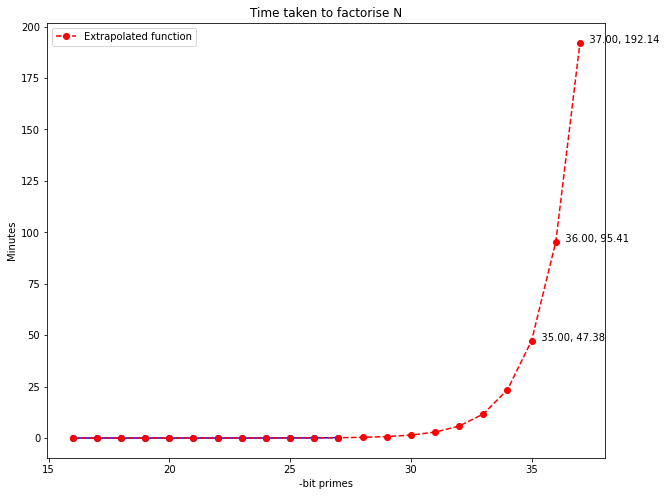

bits_list: [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
time_list: [9.159734285674944e-05, 0.0002621410920470398, 0.00030849416737466874, 0.0005809659604814701, 0.0011671258857157746, 0.002364142276180376, 0.007183519507054284, 0.009790070864116951, 0.01941324038087346, 0.04454321124025487, 0.08063134483804572, 0.18557402789287847]
time taken: 3.423506506284078 minutes


In [17]:
# Generate primes p, q and input N = p*q to the smallest_function and show the average computation time on input
# l = 16 bit primes and N = p*q for k = l, l+1, l+2,...

l = 16 # -bit primes

p = c3.random_prime(l)
q = c3.random_prime(l)
N = p*q

# List to store the number of bits, i.e., k = l, l+1, l+2,... starting with l = 16.
bit_primes = []
# List to store the average computation time for smallest_factor(N).
time_taken = []
average_time_taken = 0

# Start time to calculate the time elapsed while running the function repeatedly with increasing bit primes.
# So that we can find out how long has it passed to factorise N and modify the while loop condition to preventing 
# it from runnning too long.
start = time.time()
elapsed = 0
# Just an estimate with 150 seconds to start off with.
# Can modify it to find out the average computation time for greater bit primes.
while elapsed < 150:
    # Use random_prime(l) function to generate a random prime number with l-bits.
    p = c3.random_prime(l)
    q = c3.random_prime(l)
    N = p*q
    # Use %timeit to measure the average computation time of the smallest_factor(N) function.
    t = %timeit -o c3.smallest_factor(N)
    bit_primes.append(l)
    # Store the time taken as minutes.
    average_time_taken = t.average/60
    time_taken.append(average_time_taken) # t.average to store the average computation time in time_taken list.
    elapsed = time.time() - start
    l += 1

# Plot two lines in a graph.
plt.figure(figsize = (10,8))

# The first plotted line is the results from the above smallest_factor function performance test.
x_values = bit_primes
y_values = time_taken
plt.plot(x_values, y_values,'b-o')  

# The second plotted line is an estimated function with extrapolation to find out when the smallest_factor function becomes 
# unfeasible. We extrapolated it until 35-bit primes, as it is unfeasible to factorise N using the smallest_factor function
# starting at 35-bit primes.
x_values_ext = [i for i in range(16, 38)]
y_values_ext = [0.0000000010849*np.exp(0.7*x) for x in x_values_ext]
plt.plot(x_values_ext, y_values_ext, 'r--o', label = 'Extrapolated function')
plt.text(x_values_ext[-3], y_values_ext[-3], "   {:.2f}, {:.2f}".format(x_values_ext[-3], y_values_ext[-3]))
plt.text(x_values_ext[-2], y_values_ext[-2], "   {:.2f}, {:.2f}".format(x_values_ext[-2], y_values_ext[-2]))
plt.text(x_values_ext[-1], y_values_ext[-1], "   {:.2f}, {:.2f}".format(x_values_ext[-1], y_values_ext[-1]))

plt.xlabel("-bit primes")
plt.ylabel("Minutes")
plt.title("Time taken to factorise N")
plt.legend()
plt.show()

print("bits_list: {}".format(bit_primes))
print("time_list: {}".format(time_taken))
print("time taken: {} minutes".format(elapsed/60))

The below cell is V2. It runs for larger primes (approx. 30 bit) and thus takes much longer to complete. 

Optional run.

### 3.4 - Conclusion<a id='3.4'></a>

According to the Core 3 Results File, we can conclude that:

- From both the plotted line, we can see that the amount of time taken to factorise N grows exponentially as the bit primes increases. When p and q are 16-bit primes, the average computation time taken to factorise N is approximately 5 ms, when p and q are 24-bit primes, it takes around 1-2 seconds, at the end of the while loop, with p and q are 26-bit primes, it takes around 8-9 seconds to factorise N, hence, it is very hard to factorise N if only N is known and when p, q are large bit primes, i.e., 512-bit primes.

- From the extrapolated line, we can say that it is starting to be unfeasible to factorise N using smallest_factor function when p and q are 35-bit primes, as it takes 47 minutes to factorise N and with 37-bit primes, it takes around 192 minutes to factorise N.

## 4 - Hybrid system V1<a id='4'></a>

### 4.1 - Hybrid process<a id='4.1'></a>

In this section we will develope a system of double encryption. We will use the Vigenere cipher on the plaintext message and RSA encryption on the Vigenere key after integer conversion. The ciphertext and RSA encrypted key can then be sent to its recipient who can use their private RSA key to decrypt the Vigenere key and decipher the ciphertext message.

For this section we will assume 512-bit prime RSA encryption is used. Therefore, it is safe to use strings of length 60 for our RSA encryption. We may however, have Vigenere keys of length greater than 60, in which case we slice the key into lengths of at most 60 and encipher them individually. These enciphered slices are sent to the recipient as a tuple and after decryption and be pieced back together to realise the original key.

The function RSA_key_generator1 is taken from lectures.

In [18]:
def hybrid_send(plaintext, recipient_public, alphabet, key_length = 5):
    """Takes plaintext and RSA public keys and hybric encrypts a message using the core 4 algorithm.
    OUTPUT: ('vig message', 'RSA encrypted vig keys')."""
    
    vig_message, vig_key = vigenere_encipher(plaintext, alphabet, key_length)
    #encipher message and generate vig key
    
    no_slices = (len(vig_key)//60) + 1  #number of slices
    keys = []
    for i in range(no_slices):
        keys.append(vig_key[i*60:(i+1)*60])   #take out slices of length 60
    
    for i in range(len(keys)):
        keys[i] = c1.convert_to_integer(keys[i])   #convert each slice to integer form
        keys[i] = pow(keys[i], recipient_public[1], recipient_public[0])   #RSA encrypt each slice 
        
    keys = tuple(keys)   #convert to tuple
    
    return vig_message, keys


def hybrid_recieve(ciphertext, keys_tuple, my_private, my_public, alphabet):
    """Takes ciphertext, keys tuple and RSA keys and deciphers according to core 4 method of hybrid encryption.
    OUTPUT: 'plaintext'."""
    
    keys = list(keys_tuple)
    vig_key = ""
    for i in range(len(keys)):
        keys[i] = pow(keys[i], my_private, my_public[0])   #convert to integer
        keys[i] = c1.convert_to_text(keys[i])   #convert to vig key
        vig_key += keys[i]   #concatenate key back together
        
    plaintext = vigenere_decipher(ciphertext, vig_key, alphabet)
    
    return plaintext

###### Testing

In [19]:
# First we need to generate public and private RSA keys
# We call the function from Mathematical Programming lectures
recipient_public, my_private, fact = c1.RSA_key_generator1(512)
 #now we can test with a short message
plaintext = "SecretDemoMessage"
ciphertext, key = hybrid_send(plaintext, recipient_public, alph, key_length = 5)
deciphered = hybrid_recieve(ciphertext, key, my_private, recipient_public, alph)

print("The plaintext is: ", plaintext, "\nThe ciphertext is: ", ciphertext, 
      "\nWith encrypted key: ", str(key)[:20],"...", "\nAnd the deciphered text is: ", deciphered)

assert plaintext == deciphered

The plaintext is:  SecretDemoMessage 
The ciphertext is:  LGeYOmfgTYFGuZKZG 
With encrypted key:  (7361616136583762864 ... 
And the deciphered text is:  SecretDemoMessage


In [20]:
# Short message testing - randomly generated plaintexts length 1 - 100
    #testing messages that will have at most two key sections...
for _ in range(20):
    
    recipient_public, my_private, fact = c1.RSA_key_generator1(512)
    
    plaintext_list = [alph[random.randint(0, 51)] for m in range(random.randint(1, 100))]
    plaintext = ""
    for letter in plaintext_list:
        plaintext += letter   #created random plaintext 'message' (string of random characters)
    
    key_length = random.randint(1, 100)   #test different key lengths
    
    ciphertext, key = hybrid_send(plaintext, recipient_public, alph, key_length)   #enciphered 
    deciphered = hybrid_recieve(ciphertext, key, my_private, recipient_public, alph)   #deciphered

    assert plaintext == deciphered

print("Short message testing passed!")
   
    
# Long message testing... 
for text in list_texts:
    
    recipient_public, my_private, fact = c1.RSA_key_generator1(512)   #generate new RSA keys for each text
    extracted_text = hybrid.extract_text(hybrid.url_to_text_utf8(text), alph)   #extract text
    key_length = random.randint(1, 500)   #random key length
    
    ciphertext, key = hybrid_send(extracted_text, recipient_public, alph, key_length)   #enciphered 
    deciphered = hybrid_recieve(ciphertext, key, my_private, recipient_public, alph)   #deciphered
    assert extracted_text == deciphered
    #This takes a little bit of time...
    
print("Long text testing passed!")

Short message testing passed!
Long text testing passed!


The functions hybrid_send and hybrid_recieve seem to be working well and have passed all the tests. We have formed the second layer of encryption in our hybrid system. This has hugely increased the security of the messages sent using our functions. However, there are still weaknesses in the system. In the next section, we will develope functions to perform a Kasiski attack on Vigenere enciphered messages to demonstrate this.

## 5 - Cracking the Vigenere cipher with Kasiski analysis<a id='5'></a>

### 5.1 - The process<a id='5.1'></a>

The Kasiski approach to cracking the Vigenere cipher is to first find the length of the Vigenere key, and then use letter frequency analysis to crack the message after dividing it into parts according to the length of the key. Let $n$ be the length of the key. Once we know $n$, we can split the enciphered message into groups of characters that are all Caesar shifted by the same value (corresponding to that repeated key character). The first group consists of the $1st, (1+n)th, (1+2n)th, (1+3n)th, ...$ characters of the ciphertext; the second consists of the $2nd, (2+n)th, (2+2n)th, (2+3n)th,...$ characters of the ciphertext and so on. Provided the message is sufficiently long enough, we can then use our function crack_ceasar on each of these groups and then piece the groups back together to retreive the plaintext [5]. 

### 5.2 - Finding the key length<a id='5.2'></a>

The first step to find the key length is to track the repeated bigrams in the ciphertext and note at what positions the repetitions occur. After that, we take the differences of the repetition locations in the ciphertext and find all the factors of these numbers. The most common factor is the one *most likely* to be the key length [5].

Here are two functions which track repeated bigrams in a ciphertext and finds the factors of their locations. The final function implements the first two and selects the most likely key length.

In [21]:
def kasiski_bigrams(ciphertext):
    """Takes a ciphertext and makes a dictionary of each bigram
    in the ciphertext and at what points the bigram appears.
    OUTPUT: dictionary."""
    
    bigram_dict = {}
    for i in range(len(ciphertext)-1):

        index = ciphertext.find(ciphertext[i:i+2])   #find first time bigram occurs

        if index == i:   #if this first time is also this occasion, then it has not appeared yet
            bigram_dict[(ciphertext[i:i+2])] = str(i) + ","   
            #so this is the first occurance and it must be added to the dictionary

        else:   #if not equal, it has occured before and so we record the index
            bigram_dict[str(ciphertext[i:i+2])] += str(i) + ","
    
    return bigram_dict


# We now use the kasiski_bigrams function in the kasiski_factors function
def kasiski_factors(ciphertext):
    """Takes the Vigenere ciphertext and finds the factors of the difference of the
    locations of repeated bigrams in the ciphertext and returns them in a dictionary.
    OUTPUT: dictionary."""
    
    bigram_dict = kasiski_bigrams(ciphertext)   #make the bigram dict to find where the bigrams appear
    
    repeated_bigrams = ""
    for i in range(len(ciphertext)-1):   #shuffle through all bigrams in ciphertext
        bigram = ciphertext[i:i+2]   #assign name for ease of use
        
        if len(bigram_dict[bigram].split(",")) > 2 and (bigram + ",") not in repeated_bigrams:  
            #find bigrams that have been repeated
            repeated_bigrams += bigram + ","   #add to the list of interest

    factors = {}   #make a dictionary of bigrams and the factors of the distances between their repetitions
    for i in range(len(repeated_bigrams)//3):   #select each bigram
        bigram = repeated_bigrams[i*3: i*3+2]
        nums = bigram_dict[bigram].split(",")   #extract the locations of the repetitions
        difference = int(nums[1]) - int(nums[0])   #find the difference between the locations of the first two

        string_factors = []   #empty string to be filled with the factors
        for i in range(1, difference + 1):   #find the factors of the difference
            if difference % i == 0:
                string_factors.append(i)   #append
        
        factors[bigram] = string_factors   #add to the dictionary
        
    return factors


# And again the kasiski_factors function is used here in the find_key_length function
def find_key_length(ciphertext):
    """Uses Kasiski technique to find the likely length of the Vigenere key.
    OUTPUT: 'key_length'."""
    
    factors = kasiski_factors(ciphertext)
    all_factors = list(factors.values())   #turn values of dictionary into one list
    all_factors = [num for sublist in all_factors for num in sublist]   #flatten list into single list
    all_factors = [i for i in all_factors if i != 1]   #1 a factor of everything and if the key 
                                    #length was 1 it would be a simple caesar shift so we can exclude it
        
    key_length = statistics.multimode(all_factors)  #returns all equally most common factors 

    return key_length

##### Testing

We run a quick test here to ensure find_key_length seems to be working.

In [22]:
plaintext = "Rockfax Description A long and popular trip that has masses of interesting climbing punctuated with good belay ledges. The climbing is fairly tough in places but these sections are well-protected. Begin at a short wall just right of the thin crack at the start of Gronk."
plaintext = extract_text(plaintext, alph)
ciphertext, key = vigenere_encipher(plaintext, alph, 5)
length = find_key_length(ciphertext)
print("The calculated key length is:", length, "\nThe actual key length is: 5")

The calculated key length is: [5] 
The actual key length is: 5


In this case we get the correct result.

### 5.3 - Problems with finding key lengths<a id='5.3'></a>

Note that if the key length were not a prime number, we would expect to get a factor of the actual key length as output from find_key_length. This is because for every time we get the key length as a factor, we also get the factors of the key length itself as factors - meaning the smaller factors will always appear just as much and usually more. We also expect to see multiples of the key length appearing, however, this will be less common and so shouldn't be a problem.

We demonstrate this below.

In [23]:
ciphertext, key = vigenere_encipher(plaintext, alph, 8)
length = find_key_length(ciphertext)
print("The ciphertext is:", ciphertext, "\n")
print("The dictionary of bigrams is:", kasiski_factors(ciphertext))
print("\nThe estimated key length is: ", length, "\nHowever, the actual key length was 8.\n")

The ciphertext is: lzaxLWtVyDaEOlpAIyyyUjcsHonBVqhsLEpvVpdsNsYFSWoKyDmsOjpwLpqGOjcuFtkoOjcHOyaGaWpwxHgGNckGxmcyGuhwxrcFzdauFtkoOjcAMqYvXhuLIFeuOjlDuncFHqpLBpqrYaYLCzlFGnaOywjCXkpwwEcqhacAHlrnYdkJNHYyRfqKNCgtNpkxNscGNejuLlaxGppzyDrnXpkxaCmAQ 

The dictionary of bigrams is: {'ax': [1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 200], 'yD': [1, 2, 4, 5, 8, 10, 20, 40], 'yy': [1], 'jc': [1, 2, 4, 5, 8, 10, 20, 40], 'qh': [1, 2, 67, 134], 'Ns': [1, 2, 4, 8, 19, 38, 76, 152], 'Oj': [1, 2, 4, 8], 'pw': [1, 2, 3, 4, 6, 8, 12, 24], 'pq': [1, 2, 4, 5, 8, 10, 16, 20, 40, 80], 'uF': [1, 2, 4, 5, 8, 10, 20, 40], 'Ft': [1, 2, 4, 5, 8, 10, 20, 40], 'tk': [1, 2, 4, 5, 8, 10, 20, 40], 'ko': [1, 2, 4, 5, 8, 10, 20, 40], 'oO': [1, 2, 4, 5, 8, 10, 20, 40], 'Oy': [1, 79], 'wx': [1, 2, 4, 8, 16], 'GN': [1, 2, 4, 7, 8, 14, 16, 28, 56, 112], 'cF': [1, 2, 4, 8, 16, 32], 'cA': [1, 2, 4, 7, 8, 14, 28, 56], 'uL': [1, 3, 9, 27, 81], 'rn': [1, 2, 4, 5, 8, 10, 20, 40], 'pk': [1, 2, 3, 4, 6, 8, 12, 24], 'kx': [1, 2, 3, 4, 6

As you can see, everytime we have 8 appearing we certainly have 2 appearing also. However, we have at least reduced the number of possible key lengths to try. 

Below is a revised version of the find_key_length function which now returns an ordered list of the most likely key lengths. This will be useful as we can try the list of lengths until we crack the cipher, starting with the most likely to work.

In [24]:
def find_key_length_v2(ciphertext):
    """Uses Kasiski technique to find the possible lengths of the
    Vigenere key as a list from most likely to least.
    OUTPUT: [key_lengths]."""
    
    factors = kasiski_factors(ciphertext)
    all_factors = list(factors.values())   #turn values of dictionary into one list
    all_factors = [num for sublist in all_factors for num in sublist]   #flatten list into single list
    all_factors = [i for i in all_factors if i != 1]   #1 a factor of everything and if the key 
                                    #length was 1 it would be a simple caesar shift so we can exclude it
    fact_freq = {}
    for i in all_factors:
        if i not in fact_freq:
            fact_freq[i] = 1
        else:
            fact_freq[i] += 1

    ordered_key_lengths = sorted(fact_freq.items(), key=lambda x:x[1], reverse = True)   #order the dictionary
    lengths = []
    for length in ordered_key_lengths:
        lengths.append(length[0])   #take just the lengths (not frequencies) now in order of most frequent
    
    return lengths

Unfortunately, there is no clear way to more accurately determine the key length using the Kasiski approach. So we instead need to use trial and error to crack the cipher.

#### Aside: Best key length to use for security
Here we quickly test how using a key length of many distinct prime numbers multiplied together is the best option for security. 

In [25]:
for length in range(26, 35):
    ciphertext, key = vigenere_encipher(big_text, alph, length)
    print("\nThe Vigenere key:", key, "\nThe key length:", len(key))
    lengths = find_key_length_v2(ciphertext)
    print("Potential lengths in order:", lengths[:7])


The Vigenere key: utrQrkeBnUlwjSiHMXRXVWbRUo 
The key length: 26
Potential lengths in order: [2, 13, 26, 4, 3, 6, 52]

The Vigenere key: tuCApIohgWkyeDKUZXUsSqsPLfX 
The key length: 27
Potential lengths in order: [3, 2, 9, 27, 6, 4, 18]

The Vigenere key: bcwcZFxdELCWXWyJXVnXYPoyhfoa 
The key length: 28
Potential lengths in order: [2, 4, 7, 14, 28, 3, 8]

The Vigenere key: sJOyqGOYphuZuXfnYJRJvHcgAuArh 
The key length: 29
Potential lengths in order: [2, 29, 3, 4, 5, 58, 6]

The Vigenere key: WQVSdMRWCVOrgldAquMpmbMXGMBhXI 
The key length: 30
Potential lengths in order: [2, 3, 5, 6, 10, 15, 30]

The Vigenere key: GpeCEvbuClvnroDzUPeWuSiCAOGOrcO 
The key length: 31
Potential lengths in order: [2, 31, 3, 4, 5, 62, 6]

The Vigenere key: EipBlnHJZHETKWhuIXrKBOpjvPGnRODz 
The key length: 32
Potential lengths in order: [2, 4, 8, 16, 32, 3, 6]

The Vigenere key: eKiBmIcMUljMzOZYdravXbInqRfDgrRcT 
The key length: 33
Potential lengths in order: [3, 2, 11, 33, 6, 4, 22]

The Vigenere key: amjfZP

Above you can see that the key length $2*3*5=30$ performs best in terms of being the lowest down the list of potential key lengths compared to other numbers around it (that are not products of distinct primes). To someone trying to intercept and decipher the message, this makes it appear as though the key length of 30 is less likely.

This simply comes from the factors of the key length - every number can be factored uniquely into primes, and repeated factors (i.e. 3^2) can be checked just once (3). So this is what we do to maximise the number of factors that need to be checked. 

### 5.4 - Kasiski crack <a id='5.4'></a>

The kasiski_crack function is written below and uses crack_caesar to decipher the ciphertext after splitting it into groups according to the key length determined previously.

In [26]:
def kasiski_crack(ciphertext, key_length, alphabet):
    """Attempts to Kasiski crack the Vigenere cipher by determining the key length and
    then using letter frequency analysis to figure out the individual Caesar shifts.
    OUTPUT: 'plaintext'."""
    
    global ENG_FREQ
    cracked = [None] * len(ciphertext) 
    
    key = ""  
    
    for j in range(key_length):   #every jth letter up to length of key
        jth_letters = ""
        for i in range(len(ciphertext)):
            
            if i % key_length == j:   #jth, jth + length key, jth + 2*length key,...
                jth_letters += ciphertext[i]   #split ciphertext into j strins
                jth_cracked, shift = crack_caesar(jth_letters, alphabet, three_attempts = False)   
                #caesar crack each split string
                
                for k in range(len(jth_cracked)):   #piece cracked string back together
                    cracked[j + k*key_length] = jth_cracked[k]
                    
        key += alphabet[shift]  #reconstruct the key according to the crack process
    
    cracked = "".join(cracked)   #turn back into string
    return cracked, key  

Now we can run kasiski_crack over our list of key lengths until we get the correct plaintext output.

##### Testing

In [27]:
plaintext = Mobey_extracted[:5000]
ciphertext, key = vigenere_encipher(plaintext, alph, 8)
key_lengths = find_key_length_v2(ciphertext)
print("The plaintext:", plaintext[:50],"...", "\nThe ciphertext:", ciphertext[:50],"...", 
      "\nThe key length (assume unknown) is: 8")

count = 0
for length in key_lengths:
    count += 1
    cracked, _ = kasiski_crack(ciphertext, length, alph)
    if cracked == plaintext:
        print("\n\nThe cracked cipher reads:", cracked[:50],"...", "\nIt took", count,
              "attempts to crack so we can confirm the key length must have been", key_lengths[2],
              "which is the 3rd value in our key lengths list.")
        break

The plaintext: CHAPTERLoomingsCallmeIshmaelSomeyearsagonevermindh ... 
The ciphertext: yIUaSIPekpGtmkqVWmFxdMqAibywRskxufuCreeHjfPpqqgGZi ... 
The key length (assume unknown) is: 8


The cracked cipher reads: CHAPTERLoomingsCallmeIshmaelSomeyearsagonevermindh ... 
It took 3 attempts to crack so we can confirm the key length must have been 8 which is the 3rd value in our key lengths list.


### 5.5 - Limitations of Kasiski analysis<a id='5.5'></a>

So after some attempts we can crack the Vigenere cipher. However, note that with shorter messages, or comparatively longer keys, it becomes much harder to do this. This is because after we split the message into groups of Caesar shifts corresponding to each character of the key, we get much shorter strings of ciphered letters. If these strings are too short, the crack_caesar function can struggle to perform accurate letter frequency analysis on the ciphered strings. This results in inaccurate Caesar deciphers and, therefore, Vigenere deciphers. 

Below we test an example to show this.

In [28]:
plaintext = Mobey_extracted[:1800]
key_length = 8
ciphertext, key = vigenere_encipher(plaintext, alph, key_length)
print("The plaintext:", plaintext[:50],"...", "\nThe ciphertext:", ciphertext[:50],"...", 
      "\nThe key length (assume unknown) is: 8")

cracked, key_reconstruct = kasiski_crack(ciphertext, key_length, alph)
print("\n\nThe attempted cipher crack reads:", cracked[:50],"...\nUsing key length:", key_length)

print("\n\nLooking at the original and reconstructed keys"
      ", you can see there is a slight difference between them:\n", key, key_reconstruct)

The plaintext: CHAPTERLoomingsCallmeIshmaelSomeyearsagonevermindh ... 
The ciphertext: ClblWryToSNEqTZKaPMIhvZpmEFHVbTmyIBNvNNwnIWAuZPvdL ... 
The key length (assume unknown) is: 8


The attempted cipher crack reads: CsAPTERLoZmingsCaWlmeIshmLelSomeyParsagonPvermindS ...
Using key length: 8


Looking at the original and reconstructed keys, you can see there is a slight difference between them:
 aEBwdNHi aTBwdNHi


The attempted cipher crack (using the correct key length) for a message of 1800 characters above results in a deciphering close to actual plaintext but not entirely correct. This is because the second group string failed to be Caesar deciphered correctly due to insufficient letter frequency analysis. 

Note: if we were to try a potential key length that was some multiple of the actual key length, we could decipher the message just fine in theory. However, in practice, we may run into the problem above as we have reduced the number of characters in each group string. 

Recall from earlier the min length of a string to maximise the likelihood of cracking the Caesar cipher (taken with a large pinch of salt due to small sample size) - aproximately $500$ characters. Let the length of the ciphertext be $x$ and the length of the Vigenere key be $n$. Now consider how the kasiski_crack function works. It takes $n$ strings and applies the crack_caesar function to each of them. Therefore, each string will have approximately $y = x/n$ characters. If $y < 500$, then the crack_caesar function is less likely to accurately decipher each of these strings and in turn kasiski_crack is less likely to return the correct plaintext.

##### Testing

Here we test each of the texts with random key lengths and predict wheather the function kasiski_crack will succeed in deciphering the cipher using the $y$-value defined above. 

In [29]:
# Long message testing... 
count = 0
for text in list_texts:
    
    print("Testing text", list_texts.index(text)+1)
    extracted_text = hybrid.extract_text(hybrid.url_to_text_utf8(text), alph)   #extract text
    key_length = random.randint(1, 50)   #random key length
    char_per_string = len(extracted_text)/key_length
    print("y = ", round(char_per_string, 3))
    if char_per_string < 500:
        print("Prediction: FAIL")
    else:
        print("Prediction: PASS")
    print("Actual key length is:", key_length)
    
    ciphertext, key = vigenere_encipher(extracted_text, alph, key_length)   #enciphered 
    
    
    print("\tTesting crack...")
    cracked, key = kasiski_crack(ciphertext, key_length, alph)   #deciphered
        
    if extracted_text == cracked:   #pass/fail
        print("\tTest PASSED! :D\n")
        count += 1
    else:
        print("\tTest FAILED! :(\n")
    
print("Long text testing complete.\n", count, "out of 6 tests passed.")

Testing text 1
y =  1728.0
Prediction: PASS
Actual key length is: 8
	Testing crack...
	Test PASSED! :D

Testing text 2
y =  2087.24
Prediction: PASS
Actual key length is: 25
	Testing crack...
	Test PASSED! :D

Testing text 3
y =  370.654
Prediction: FAIL
Actual key length is: 26
	Testing crack...
	Test FAILED! :(

Testing text 4
y =  154.357
Prediction: FAIL
Actual key length is: 42
	Testing crack...
	Test FAILED! :(

Testing text 5
y =  385.652
Prediction: FAIL
Actual key length is: 23
	Testing crack...
	Test FAILED! :(

Testing text 6
y =  286.806
Prediction: FAIL
Actual key length is: 31
	Testing crack...
	Test FAILED! :(

Long text testing complete.
 2 out of 6 tests passed.


Also note that the longer the key length the more times the function calls crack_caesar and so the more likely it is to fail. 

The above tests seem to predict the outcome of the attempted crack with somewhat decent accuracy (run multiple times to test).

#### Automated version of Kasiski crack funtion:

In the below cell, we have implemented the kasiski_crack function over a for loop into a new function to automate the process of finding the best fitting crack. It works by first finding the list of potential key lengths and selecting the top 0.4% (or 5, whichever is most) of these for testing. It then runs the for loop with each potential length to get the potential deciphers. We then compare the frequecies of each letter of each of the deciphered texts to those of known English using a score function (see below in code).  The decipher with the lowest score is our best candidate for the deciphering as it is closest to the known frequencies of the English language. 

In [30]:
def kasiski_crack_v2(ciphertext, alphabet, verbose = False):
    """Automates the kasiski_crack function to return the best candidate for the
    correct deciphering of the Vigenere ciphertext. 
    OUTPUT: crack, keylength, reconstructed key"""
    
    global ENG_FREQ_UNSORT
    
    lengths = find_key_length_v2(ciphertext)   #list of potential key lengths
    perc = max(round(0.004 * len(lengths)), 5)   #top 0.4% of lengths
    lengths_tested = lengths[:perc]
    let_difs = []
    cracks = []
    keys = []
    
    if verbose == True:
        print(lengths_tested)
    
    for length in lengths_tested:
        cracked, key = kasiski_crack(ciphertext, length, alphabet)   #crack using key length
        crack_dict = character_freq(cracked, alphabet, sort = False)   #create dictionary of cracked letter freq.
        
        let_dif = 0
        for let in alphabet:
            let_dif += (crack_dict[let] - ENG_FREQ_UNSORT[let])**2   
            #score function: the closer to 'true' English, the lower the score
        
        let_difs.append(let_dif)
        cracks.append(cracked)
        keys.append(key)
        #print(cracked)
    
    best_dif = min(let_difs)
    #print(let_difs, best_dif)
    index = let_difs.index(best_dif)
    
    return cracks[index], lengths_tested[index], keys[index]

##### Testing

Here we test the automated version with two of the example texts.

In [31]:
for i in (2, 3):    
    text = hybrid.extract_text(hybrid.url_to_text_utf8(list_texts[i]), alph)   #extract text
    length = random.randint(4, 15)
    ciphertext, key = vigenere_encipher(text, alph, length)   #encryption

    print("\nThe key lengths kasiski_crack_v2 will test...")
    cracked, length_tested, key_reconstruct = kasiski_crack_v2(ciphertext, alph, True)
    print("The best crack the function found... \n", cracked[:300], "...")


The key lengths kasiski_crack_v2 will test...
[7, 2, 14, 3, 21, 4]
The best crack the function found... 
 CHAPTERLoomingsCallmeIshmaelSomeyearsagonevermindhowlongpreciselyhavinglittleornomoneyinmypurseandnothingparticulartointerestmeonshoreIthoughtIwouldsailaboutalittleandseethewaterypartoftheworldItisawayIhaveofdrivingoffthespleenandregulatingthecirculationWheneverIfindmyselfgrowinggrimaboutthemouthwhe ...

The key lengths kasiski_crack_v2 will test...
[2, 4, 8, 3, 6]
The best crack the function found... 
 ThevastgrayexpanseofthedesertlaystillasapictureintheheatoftheearlyafternoonThesilenceofwasteplaceshelditItwasgauntandsterilecladwithadrabgrowthofsageflatasatableandwiththewhitescurfofthealkalibreakingthroughitsparchedskinItwastheearthleansaplessandmarkedwithdiseaseAchainofpurplehillslookeddownonitsd ...


And see it returns close to if not exactly the plaintext. 

### 5.6 - Hybrid system V1 vulnerabilities <a id='5.6'></a>

Finally, we demonstrate how this technique can penetrate our V1 Hybrid system when encrypting long messages, without use of the RSA encrypted key. Since the Kasiski approach to deciphering the Vigenere cipher doesn't require the key at all, the RSA encryption in our hybrid system is rendered useless. 

In [32]:
print("Here, we will attempt to send the book 'Emma' using our hybrid system\n", Emma_extracted[:80], "...")
plaintext = Emma_extracted[:7000]   #Secret plaintext
key_length = 9
recipient_public, my_private, fact = c1.RSA_key_generator1(512)   # Generate RSA keys for the hybrid system
ciphertext, _ = hybrid_send(plaintext, recipient_public, alph, key_length)   # Apply the hybrid system
print("\nThe ciphertext is intercepted!\n", ciphertext[:80], "...")


print("\nThe list of potential key lengths from find_key_length_v2 is:")
cracked, length_tested, key_reconstruct = kasiski_crack_v2(ciphertext, alph, True)
print("\nSo we crack using each length and analyse for the best option.")
print("Here is the decipher with the best score...\n", cracked[:80], "...")

Here, we will attempt to send the book 'Emma' using our hybrid system
 EmmaWoodhousehandsomecleverandrichwithacomfortablehomeandhappydispositionseemedt ...

The ciphertext is intercepted!
 hYHBtwkTaRgNFEijTlRYzDImrUkDZySFkdmbWTvDLubekWMwMBpkcXDZyIxxloWLeKPPqpYhQezFJmZj ...

The list of potential key lengths from find_key_length_v2 is:
[3, 9, 2, 6, 18]

So we crack using each length and analyse for the best option.
Here is the decipher with the best score...
 EmmaWoodhousehandsomecleverandrichwithacomfortablehomeandhappydispositionseemedt ...


In this section we implemented functions to analyse and crack the Vigenere cipher using the previously developed function crack_caesar. We then explored the difficulties and limitations of the process and did our best to overcome and automte them. The updated version, kasiski_crack_v2, did this by comparing the potential deciphered texts to the English language, again, using similar techniques to those previously used in crack_caesar. 

The work here served a purpose - to expose weaknesses in the hybrid system. And, from the example above we can see that we have done this with some ease. 

Clearly, our hybrid system is not very secure, especially when using short or prime key lengths or very long messages. So to improve security, one can use a long key length with many distinct factors (say, $length = 2*3*5*7*11$) and only send shorter messages. Alternatively (or additionally even), there is a technique of encoding we can use that renders the Kasiski analysis approach essentially useless. In the next section we will implement encoding before applying ciphers to disguise the frequencies of letters in the text. 

## 6 - Bigram encoding to prevent Kasiski analysis<a id='6'></a>

### 6.1 - Motivation<a id='6.1'></a>

To prevent Kasiski analysis on our enciphered messages, we can encode the message before encryption. We do this by allocating $n$ many bigrams (pairs of letters, 'AB', 'AC', ..., 'ZX') to each letter of the alphabet and randomly selecting one of these $n$ options to replace each letter in the plaintext. This can effectively mask the frequencies of letters in the message/text by making the apparent frequencies uniform. Effectively, this reduces the ability to use the Kasiski approach to deciphering the text dramatically. We explain in more detail the process below. 

### 6.2 - Allocating bigrams<a id='6.2'></a>

Below we generate the $52*51=2652$ different bigrams without letter repitition (i.e. 'AA', 'BB',...) to be allocated later.

In [33]:
def two_grams(alphabet):
    """Generates all the 2-grams excluding repeated letters.
    OUTPUT: 'two_grams'."""
    
    two_gram = []
    for letter1 in alphabet:
        for letter2 in alphabet:
            if letter1 != letter2:   #no double letters i.e. 'AA'
                two_gram.append(str(letter1) + str(letter2))   #constructed all of 25 X 26 2-grams
    
    return two_gram

In [34]:
BIGRAMS = two_grams(alph)
print(BIGRAMS[16:35])   

['ar', 'as', 'at', 'au', 'av', 'aw', 'ax', 'ay', 'az', 'aA', 'aB', 'aC', 'aD', 'aE', 'aF', 'aG', 'aH', 'aI', 'aJ']


We don't want repeated letters, i.e. 'AA', 'BB',... This is because a pattern of say 'AAAA', although unlikely to appear, would indicate a double letter in our plaintext - 'ee' or 'oo' for example - which could make it easier to crack our message.

Next we need some functions that allocate $n=52*51*letterfreq$ number of bigrams to each letter of the alphabet. This will essentially mask the frequency of letters by making the occurences of each of the bigrams roughly uniform, preventing any type of frequency analysis.

In [35]:
# To find out how many bigrams each letter should have
def number_grams(alphabet):
    """Takes large extracted text and returns a dictionary of alphabet with 
    how many two grams each letter should be assigned to.
    OUTPUT: dictionary."""
    
    global ENG_FREQ_UNSORT
    
    options = len(alphabet)*(len(alphabet)-1) - len(alphabet)   
    # -len(alph) to allow room for each letter to have minimum 1 allowcation
    
    no_grams = {}
    for let in alphabet:
        no_grams[let] = math.floor(options * ENG_FREQ_UNSORT[let]) + 1   # +1 to ensure at least 1 allocation
        
    return no_grams

# To randomly allocate specific bigrams to letters
def random_allocation(no_grams, alphabet):
    """Takes dictionary (from function 'number_grams'), all possible 2-grams
    and the alphabet to be encoded and returns a dictionary corresponding to
    strings that contain the set of encoding 2-grams for each letter of the alphabet.
    OUTPUT: dictionary."""
    
    global BIGRAMS
    
    options = len(alphabet)*(len(alphabet)-1)   #all possible 2-grams (minus repeats such as 'AA', 'BB,...')
    gram_dict = {}
    used = ""   #ensure no 2-gram used twice
    
    for let in alphabet:
        grams = ""
        
        while len(grams) < no_grams[let]*3:   #fill the string of 2-grams until it has the right amount 
            index = random.randrange(options)
            
            if (BIGRAMS[index] + " ") not in used:
                grams += BIGRAMS[index] + " "
                used += BIGRAMS[index] + " "
        
        gram_dict[let] = grams
        
    return gram_dict

##### Testing

Here we perform a check to show how bigrams are allocated to the letter 'a'. 

In [36]:
# We will use lowercase letters only for now
alph_lower = string.ascii_lowercase
no_grams = number_grams(alph)
gram_dict = random_allocation(no_grams, alph)
print("The list of bigrams for the letter 'a' are: " + gram_dict['a'][:35] + "...")
print("The number of bigrams in this list is: " + str(len(gram_dict['a'])//3))
print("The correct number of bigrams according to 'number_grams' is: " + str(no_grams['a']))
print("The frequency of 'a' multiplied by 2652 is: " + str(ENG_FREQ_UNSORT['a'] * 52*51))

The list of bigrams for the letter 'a' are: Pj BI Or Wc Mq mE bS RD uK fe cy SR...
The number of bigrams in this list is: 211
The correct number of bigrams according to 'number_grams' is: 211
The frequency of 'a' multiplied by 2652 is: 214.8978635644635


### 6.3 - Encoding/Decoding<a id='6.3'></a>

Below is a function which records encoding information in a string. It cycles the alphabet and lists the bigrams for each letter, separating letters by a '-' symbol. This will be useful for transferring the coding information with the key in our hybrid system later on.

In [37]:
def encoding_info(gram_dict, alphabet, divide = "-"):
    """Returns the encoding information for 2-gram letter frequency masking.
    OUTPUT: 'string'."""
    
    info = ""
    for let in alphabet:
        info += gram_dict[let] + divide
    return info

In [38]:
print("...", encoding_info(gram_dict, alph_lower, divide = "-")[600:700], "...")
#the first section corresponds to 'a' and the second to 'b'

... zB xe GU lV Ie sK vI FW yf DF MG -Wo nu Pr eF aS eq fP dN WG VI xY sC fL Hl AH CF mi sA gZ Sf vM Su  ...


Now, to encode we simply choose at random one of the bigrams from our pre-determined selection to replace each letter of the plaintext. And to decode, we just look at which set each bigram in the encoded message falls into and select the corresponding letter for that set.

In [39]:
def encoding(plaintext, no_grams, gram_dict, alphabet):
    """Encodes text by randomly selecting a 2-gram from the set of options previously determined.
    OUTPUT: 'encoded_text'."""
    
    encoded_text = ""
    for let in plaintext:
        index = random.randrange(no_grams[let])   #choose a random 2-gram from selection
        gram = (gram_dict[let])[index*3:index*3+3]   #find that 2-gram
        encoded_text += gram[:2]
        
    return encoded_text


def decoding(encoded_text, gram_dict, alphabet):
    """Decodes text using gram_dict to retrieve the original text.
    OUTPUT: 'decoded_text'."""
    
    decoded = ""
    for i in range(len(encoded_text)//2):
        for let in alphabet:
            if (encoded_text[i*2:i*2+2] + " ") in gram_dict[let]:
                decoded += let
    
    return decoded

##### Testing

A quick test to check the concept is working.

In [40]:
plaintext = "hellotestMessage"
no_grams = number_grams(alph)
message = encoding(plaintext, no_grams, gram_dict, alph)
print("The plaintext message is: " + str(plaintext))
print("The encoded message is: " + str(message))
decoded = decoding(message, gram_dict, alph)
print("The decoded message is: " + str(decoded))

The plaintext message is: hellotestMessage
The encoded message is: hbtreztcpRaRSoJcaWjglXRIkPuySAnZ
The decoded message is: hellotestMessage


Here, we run another test to demonstrate the masking ability of the bigram encoding.

In [41]:
url = "https://raw.githubusercontent.com/cmh42/hc/main/message_treasure_island.txt"
plaintext = hybrid.extract_text(hybrid.url_to_text_utf8(url), alph)
no_grams = number_grams(alph)
gram_dict = random_allocation(no_grams, alph)
encoded = encoding(plaintext, no_grams, gram_dict, alph)


plain_freq = character_freq(plaintext, alph)
encoded_freq = character_freq(encoded, alph)
plain_list = []
encoded_list = []
for letter in alph:
    plain_list.append(plain_freq[letter])
    encoded_list.append(encoded_freq[letter])
    
print("The list of letter frequencies in the plaintext for the first 5 letters in alph:\n",
      plain_list[:5],"\n")
print("The list of letter frequencies in the encoded text for the first 5 letters in alph:\n", 
      encoded_list[:5])
print("\nThe minimum and maximum frequencies of letters in the plaintext are:",
      min(plain_list), max(plain_list))
print("The minimum and maximum frequencies of letters in the encoded text are:",
      min(encoded_list), max(encoded_list))

The list of letter frequencies in the plaintext for the first 5 letters in alph:
 [0.0859075535512965, 0.016121758737316798, 0.02142051860202931, 0.045997745208568204, 0.12322435174746336] 

The list of letter frequencies in the encoded text for the first 5 letters in alph:
 [0.01899661781285231, 0.01871476888387824, 0.018151071025930103, 0.020462232243517474, 0.019954904171364148]

The minimum and maximum frequencies of letters in the plaintext are: 0.0 0.12322435174746336
The minimum and maximum frequencies of letters in the encoded text are: 0.01713641488162345 0.02164599774520857


So the variation in frequencies is greatly reduced by encoding, from a spread of $0.123$ to $0.00484$. Now, each letter appears more or less as frequent as the others, removing any possibility of using Kasiski analysis to crack the cipher.

### 6.4 - Hybrid system V2<a id='6.4'></a>

We can implement this encoding into our hybrid system of encryption to add another layer of protection of our message. The idea is that the plaintext is encoded using the bigram method first and then Vigenere encrypted and the encoding info is appendeded to the Vigenere key. The Vigenere key and the encoding info is then sliced and RSA encrypted as before. The idea of the encoding is that it should provide protection against Kasiski style analysis. 

In [42]:
def hybrid_send_v2(plaintext, recipient_public, alphabet, key_length = 5, return_dict = False):
    """Takes plaintext and encodes it with 2-gram mapping and then RSA and hybrid
    encrypts the message using the core 4 algorithm.
    OUTPUT: ('vig message', 'RSA encrypted vig keys -- encoding info')."""
    
    global BIGRAMS
    
    no_grams = number_grams(alphabet)   #create dict for number of bigrams per letter
    gram_dict = random_allocation(no_grams, alphabet)   #create dictionaries for encoding
    plaintext = encoding(plaintext, no_grams, gram_dict, alphabet)   #do the encoding
    info = encoding_info(gram_dict, alphabet, divide = "-")   #encoding information
    
    vig_message, vig_key = vigenere_encipher(plaintext, alphabet, key_length)   
    #encipher message and generate vig key
    vig_key += "--" + info   #add encoding info to vig key
    
    no_slices = (len(vig_key)//60) + 1  #number of slices
    keys = []
    for i in range(no_slices):
        keys.append(vig_key[i*60:(i+1)*60])   #take out slices of length 60
    
    for i in range(len(keys)):
        keys[i] = c1.convert_to_integer(keys[i])   #convert each slice to integer form
        keys[i] = pow(keys[i], recipient_public[1], recipient_public[0])   #RSA encrypt each slice 
        
    keys = tuple(keys)   #convert to tuple
    
    if return_dict == True:
        return vig_message, keys, gram_dict
    
    else:
        return vig_message, keys


def hybrid_recieve_v2(ciphertext, keys_tuple, my_private, my_public, alphabet):
    """Takes ciphertext, keys tuple and encoding info and RSA keys and deciphers
    according to core 4 method of hybrid encryption and 2-gram encoding.
    OUTPUT: 'plaintext'."""
    
    keys = list(keys_tuple)
    vig_key = ""
    for i in range(len(keys)):
        keys[i] = pow(keys[i], my_private, my_public[0])   #convert to integer
        keys[i] = c1.convert_to_text(keys[i])   #convert to vig key
        vig_key += keys[i]   #concatenate key back together
        
    keys = vig_key
    index = keys.find("-")
    vig = keys[:index]
    
    enc = keys[index+2:]   #find encoding info
    gram_dict = {}   #create dictionary for encoding
    for let in alphabet:
        index = enc.find("-")   #find info for each letter
        gram_dict[let] = enc[:index]   #input into dictionary
        enc = enc[index+1:]   #update encoding info string
    
    plaintext = vigenere_decipher(ciphertext, vig, alphabet)
    decoded_text = decoding(plaintext, gram_dict, alphabet)
    
    return decoded_text

##### Testing

In [43]:
# Short message testing
print("Super short message test:")
plaintext = "HelloThisIsATestMessageForYou"
recipient_public, my_private, fact = c1.RSA_key_generator1(512)
ciphertext, keys_tuple = hybrid_send_v2(plaintext, recipient_public, alph, key_length = 5)
print("The plaintext is:", plaintext, "\nThe ciphertext is:", ciphertext)
deciphered = hybrid_recieve_v2(ciphertext, keys_tuple, my_private, recipient_public, alph)
print("The deciphered text is:", deciphered)
assert plaintext == deciphered


# More short message testing - randomly generated plaintexts length 1 - 100
    #testing messages that will have at most two key sections...
for n in range(10):
    
    recipient_public, my_private, fact = c1.RSA_key_generator1(512)
    
    plaintext_list = [alph[random.randint(0, 51)] for m in range(random.randint(1, 100))]
    plaintext = ""
    for letter in plaintext_list:
        plaintext += letter   #created random plaintext 'message' (string of random characters)
    
    key_length = random.randint(1, 100)   #test different key lengths
    
    ciphertext, keys_tuple = hybrid_send_v2(plaintext, recipient_public, alph, key_length)   #enciphered 
    deciphered = hybrid_recieve_v2(ciphertext, keys_tuple, my_private, recipient_public, alph)   #deciphered

    assert plaintext == deciphered

print("\nShort message testing passed!")
   
    
# Long message testing... 
for text in list_texts:
    
    recipient_public, my_private, fact = c1.RSA_key_generator1(512)   #generate new RSA keys for each text
    extracted_text = hybrid.extract_text(hybrid.url_to_text_utf8(text), alph)   #extract text
    key_length = random.randint(1, 500)   #random key length
    
    ciphertext, key = hybrid_send_v2(extracted_text, recipient_public, alph, key_length)   #enciphered 
    deciphered = hybrid_recieve_v2(ciphertext, key, my_private, recipient_public, alph)   #deciphered
    assert extracted_text == deciphered
    #This takes a little bit of time...
    
print("Long text testing passed!")

Super short message test:
The plaintext is: HelloThisIsATestMessageForYou 
The ciphertext is: VwgCFqDVVFephAoLjkftlpwyHBOGncCRLsJuMlfrtMJVjcFPpjysdkEcSK
The deciphered text is: HelloThisIsATestMessageForYou

Short message testing passed!
Long text testing passed!


### 6.5 - Evaluation of improved hybrid system<a id='6.5'></a>

In this section we have again improved the security of the messages/texts we can send using out hybrid system. The problem we faced was the use of letter frequency analysis which used repeated bigrams to find estimates for the length of the Vigenere key and then used the crack_caesar function to decipher independent strings of letters according to these lengths. Encoding the plaintext means that the crack_caesar function has no traction on the enciphered text because there are no discrepancies in the frequencies of letters. Therefore, our kasiski_crack functions from the previous section stand no chance at deciphering any encoded message. Below is a demonstration of this.

In [44]:
text = hybrid.extract_text(hybrid.url_to_text_utf8(list_texts[4]), alph)
recipient_public, my_private, fact = c1.RSA_key_generator1(512)

ciphertext, key, gram_dict = hybrid_send_v2(text[:4000], recipient_public, alph, 10, True)
print("A top-secret message is intercepted...\n", ciphertext[:100], "...")
cracked, length_test, key_reconstruct = kasiski_crack_v2(ciphertext, alph, verbose = True)
print("\nWe decide to use Kasiski analysis to try and decipher the message using the key lengths above...\n",
      cracked[:100], "...")
print("\nThe function attempted the crack using a key length of:", length_test)
decoded = decoding(cracked, gram_dict, alph)
print("\nAfter deciphering and decoding, the result is...\n", decoded[:100], "...")

A top-secret message is intercepted...
 yeIDjlPNgshCWXyULcGiAVuqUtLcmZJrhaYKCXjXWVevuaDbOoOHSrmLaKWsixNbRfKHsLuzvUrtkSRbaDsgdjwgtBRLfFwGkEyR ...
[2, 3, 4, 5, 6, 7, 8, 10, 9, 11]

We decide to use Kasiski analysis to try and decipher the message using the key lengths above...
 pPYolxaLatYnmIAgWaAjrGKbWFWagaAcxLaWNVdYNGugwmOZIpFsicoXlIQtZidMTrVFmMlkLFtFvQLcRoIRfvHenCIwvqySvCsS ...

The function attempted the crack using a key length of: 10

After deciphering and decoding, the result is...
 ldlfuripnatasnaofdswruneeeiatrullXhoviswuhaaemttleehgeohalhdohaoifhnssherrelsslulccnndrrevopalttidsd ...


As you can clearly see, the attempt at deciphering the message failed and there is no resemblance to actual English sense. The function struggled to find any patterns in the key lengths indicating the uniformity of the characters in the ciphertext. Even on the occasion that the correct key length was used, the decoded message had no resemblance to the plaintext. This, again, was due to the crack_caesar function not being able to distinguish between different frequencies of letters. 

The final section of this project focuses on adjusting our system to handle different characters such as punctuation, numbers and printable whitespace. 

## 7 - Extra characters <a id='7'></a>

### 7.1 - Motivation<a id='7.1'></a>

The goal in this section is to improve our system so that we can send not only alphabetic letters but also numbers, punctuation and white space characters (preserving formatting). To do this we need to reassign this new selection of characters to the set of bigrams and resolve a problem with the Vigenere keys.

### 7.2 - Function adjustments<a id='7.2'></a>

In [45]:
printable = string.printable
printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

We want to be able to encipher and decipher all of the above characters (including white space). To do this, we subtly edit a few of the previous functions from section 5 where we encode the text pre-encryption. The choice for bigrams should remain as the $51*52$ bigrams from before, but now spread across all $100$ characters and white spaces for encoding.

In [46]:
# To find out how many bigrams each letter should have
def number_grams_v2(alphabet):
    """Takes large extracted text and returns a dictionary of alphabet with 
    how many two grams each letter should be assigned to.
    OUTPUT: dictionary."""
    
    global ENG_FREQ_UNSORT, BIGRAMS
    options = len(BIGRAMS) - len(alphabet)  
    # -len(alph) to allow room for each letter to have minimum 1 allocation
    
    no_grams = {}
    for let in alphabet:
        no_grams[let] = math.floor(options * ENG_FREQ_UNSORT[let]) + 1   # +1 to ensure at least 1 allocation
        
    return no_grams

# To randomly allocate specific bigrams to letters
def random_allocation_v2(no_grams, alphabet):
    """Takes dictionary (from function 'number_grams'), all possible 2-grams
    and the alphabet to be encoded and returns a dictionary corresponding to
    strings that contain the set of encoding 2-grams for each letter of the alphabet.
    OUTPUT: dictionary."""
    
    global BIGRAMS
    
    options = len(BIGRAMS)   #all possible 2-grams (minus repeats such as 'AA', 'BB,...')
    gram_dict = {}
    used = ""   #ensure no 2-gram used twice
    
    for let in alphabet:
        grams = ""
        
        while len(grams) < no_grams[let]*3:   #fill the string of 2-grams until it has the right amount 
            index = random.randrange(options)
            
            if (BIGRAMS[index] + " ") not in used:
                grams += BIGRAMS[index] + " "
                used += BIGRAMS[index] + " "
        
        gram_dict[let] = grams
        
    return gram_dict

The only change to the vigenere_encipher/decipher functions is in the key generation. Now the only possible characters for the key are alphabetic letters. This is a patch as, after some testing, we noticed that the hybrid system V3 would fail only some of the time, meaning the reason must be to do with some element of randomness in our functions. Therefore, we deduced that the problem lay in the key generation of the vigenere_encipher function. After restricting the key to alphabetic characters only, the hybrid system V3 described below seems to be working at every attempt.  

We suspect the "\\" character is what causes problems in the key due to its properties in python strings.

In [47]:
def vigenere_encipher_v2(plaintext, alphabet, key_length = 5):
    """Vigenere enciphers a message string.
    OUTPUT: ('enciphered message', 'key')."""
    
    key_alph = string.ascii_letters
    key = ''.join(random.choice(key_alph) for i in range(key_length))   
    #generate the random key using characters from 'ascii_letters'
    
    ciphertext = ""   #create empty string
    for i in range(len(plaintext)):
        shift = alphabet.find(key[i % len(key)])   #find Caesar shift using key index
        ciphertext += caesar_shift(plaintext[i], shift, alphabet)   #Caesar shift the letter 
    
    return ciphertext, key


def vigenere_decipher_v2(ciphertext, key, alphabet):
    """Vigenere deciphers a message string.
    OUTPUT: 'deciphered message'."""
    
    plaintext = ""   #create empty string
    for i in range(len(ciphertext)):
        shift = alphabet.find(key[i % len(key)])   #find Caesar shift
        plaintext += caesar_invert_shift(ciphertext[i], shift, alphabet)   #inverse the Caesar shift
        
    return plaintext

### 7.3 - Hybrid system V3 <a id='7.3'></a>

Now, implementing the updated functions above into the hybrid system, we have version 3 which encodes any text, Vigenere enciphers it and RSA encrypts the key. 

In [48]:
def hybrid_send_v3(plaintext, recipient_public, alphabet, key_length = 5):
    """Takes plaintext and encodes it with 2-gram mapping and then RSA and hybrid
    encrypts the message using the core 4 algorithm.
    OUTPUT: ('vig message', 'RSA encrypted vig keys -- encoding info')."""
    
    global BIGRAMS
    
    no_grams = number_grams_v2(alphabet)   #create dict for number of bigrams per letter
    gram_dict = random_allocation_v2(no_grams, alphabet)   #create dictionaries for encoding
    plaintext = encoding(plaintext, no_grams, gram_dict, alphabet)   #do the encoding
    info = encoding_info(gram_dict, alphabet, divide = "-")   #encoding information
    
    vig_message, vig_key = vigenere_encipher_v2(plaintext, alphabet, key_length)   
    #encipher message and generate vig key
    vig_key += "--" + info   #add encoding info to vig key
    
    no_slices = (len(vig_key)//60) + 1  #number of slices
    keys = []
    for i in range(no_slices):
        keys.append(vig_key[i*60:(i+1)*60])   #take out slices of length 60
    
    for i in range(len(keys)):
        keys[i] = c1.convert_to_integer(keys[i])   #convert each slice to integer form
        keys[i] = pow(keys[i], recipient_public[1], recipient_public[0])   #RSA encrypt each slice 
        
    keys = tuple(keys)   #convert to tuple
    
    return vig_message, keys


def hybrid_recieve_v3(ciphertext, keys_tuple, my_private, my_public, alphabet):
    """Takes ciphertext, keys tuple and encoding info and RSA keys and deciphers
    according to core 4 method of hybrid encryption and 2-gram encoding.
    OUTPUT: 'plaintext'."""
    
    keys = list(keys_tuple)
    vig_key = ""
    for i in range(len(keys)):
        keys[i] = pow(keys[i], my_private, my_public[0])   #convert to integer
        keys[i] = c1.convert_to_text(keys[i])   #convert to vig key
        vig_key += keys[i]   #concatenate key back together
        
    keys = vig_key
    index = keys.find("-")
    vig = keys[:index]
    
    enc = keys[index+2:]   #find encoding info
    gram_dict = {}   #create dictionary for encoding
    for let in alphabet:
        index = enc.find("-")   #find info for each letter
        gram_dict[let] = enc[:index]   #input into dictionary
        enc = enc[index+1:]   #update encoding info string
    
    plaintext = vigenere_decipher_v2(ciphertext, vig, alphabet)
    decoded_text = decoding(plaintext, gram_dict, alphabet)
    
    return decoded_text

We also update the ENG_FREQ_UNSORT dictionary to include frequencies of the new characters/white spaces.

In [49]:
#recall the list of text url's from before

big_text = ""
for i in range(len(list_texts)):
    big_text += hybrid.extract_text(hybrid.url_to_text_utf8(list_texts[i]), printable)
    #extract the content and append all texts together
    
ENG_FREQ_UNSORT = character_freq(big_text, printable, sort = False)

In [50]:
# A test using the book Emma 
for _ in range(1):
    emma_url = "https://raw.githubusercontent.com/cmh42/hc/main/message_emma.txt"
    text = hybrid.extract_text(hybrid.url_to_text_utf8(emma_url), printable)[:1000]
        #recall the emma book from earlier
    recipient_public, my_private, fact = c1.RSA_key_generator1(512)
        #generate RSA keys

    print("\nThe plaintext is:\n", text[:400], "...")

    ciphertext, key = hybrid_send_v3(text, recipient_public, printable, 5) 
    print("\n\nThe ciphertext is:\n", ciphertext[:200], "...")

    deciphered = hybrid_recieve_v3(ciphertext, key, my_private, recipient_public, printable)
    print("\n\nThe deciphered text is:\n", deciphered[:400], "...")

    assert text == deciphered


The plaintext is:
 Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings of
existence; and had lived nearly twenty-one years in the world with very
little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage, been
mistress of his hous ...


The ciphertext is:
PL	_(^p]\.Q))_{+x_\[+(P.:[(L.d.&:'	#Z!-((\|~!A~2,\&|(_<RP\fT-~	0Py](^01KKP\~Zu~@
@#(%~)<*){;NzQ= ...]^;D.*1OT)?>^G


The deciphered text is:
 Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings of
existence; and had lived nearly twenty-one years in the world with very
little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage, been
mistress of his hous ...


As you can see, all the white space formatting is preserved from the original text. 

##### Testing

In [51]:
# Long message testing... 
for text in list_texts:
    
    recipient_public, my_private, fact = c1.RSA_key_generator1(512)   #generate new RSA keys for each text
    extracted_text = hybrid.extract_text(hybrid.url_to_text_utf8(text), printable)   #extract text
    #print("\n\n", extracted_text[:200])
    key_length = random.randint(1, 100)   #random key length
    
    ciphertext, key = hybrid_send_v3(extracted_text, recipient_public, printable, key_length)   #enciphered 
    deciphered = hybrid_recieve_v3(ciphertext, key, my_private, recipient_public, printable)   #deciphered
    #print("\n\n", ciphertext[:200],"\n\n", deciphered[:200])
    
    assert extracted_text == deciphered
    #This takes a little bit of time...
    
print("Long text testing passed!")

Long text testing passed!


In this section, we adapted our hybrid system to deal with all printable characters. Because of the way we had written out functions, this was relatively easy to do with just a few small changes needed to get it working. 

## 8 - Conclusion<a id='8'></a>

Throughout this project we have met and overcame several problems with making a secure system of sending and recieving messages and texts. 

Firstly, we used the Vigenere cipher and RSA encryption to secure the key. The main problem with RSA encryption is the data you encrypt is restricted by the size of $N$ (the product of the primes $p, q$). As we saw from our analysis in section 3, the larger the primes you use to construct $N$, the harder it becomes to factorise it (this happens as an exponential relationship). We overcame this problem by slicing the data into multiple strings of acceptable length and encrypting them individually. In our examples we used 512-bit primes $p, q$. In reality it wouldn't take *too* much computing power to factorise $N$, and so larger prime numbers would be needed for secure use. However, as a proof of concept, this worked fine. 

This was as far as our version 1 system went in terms of secure encryption, and it left some holes to patch - primarily, the use of letter frequency analysis (Kasiski). By writing and testing functions that implement Kasiski style analysis, we learned what the limitations of this approach were and how exactly it worked. It turned out this type of attack relies on the characteristic frequencies of letters in the English language and plaintext. Therefore, to patch this problem we encoded the plaintext before encryption. This masked the frequency of letters and gave the illusion of each character being equally common in the ciphertext. This made it impossible to compare frequencies to the English language and therefore very difficult to decipher the message without the key.

In the final version of the hybrid system we tidied everything up by allowing it to take inputs of any printable character, therefore, preserving the formatting of the text. Thankfully this was a relatively straightforward fix, as throughout the project we had been using 'alphabet' as an input into our functions already. All that was required was some small adjustments to the encoding functions to allow for the right number of bigrams to be assigned to each printable character and one restriction on the generation of the random Vigenere key. The problem with the key seemed to be that the "\\" symbol interferes with python strings. Nevertheless, it was an easy fix as we simply restricted the choice of characters for the random key to just alphabetic letters. This in theory has some effect on the security of the cipher, but for this example it won't be dramatic.

## 9 - Glossary <a id='9'></a>

- Bigram - an ordered pair of two characters.
- Cipher - an algorithm for encripting and decripting data.
- Ciphertext - the message after some sort of encryption has been applied. 
- Crack - decripting a ciphertext without entire knowledge of the cipher or cipher key.
- Deciphered text - the text after decryption, not always successfully the same as the plaintext.
- Encoding - putting information into a particular format for ease of use or storage.
- Hybrid encryption - a system which uses multiple forms of encryption on a plaintext.
- Plaintext - a readable message or piece of data before any encryption has been applied.
- White space - new line, tab, indents; any formatting characters that aren't a symbol.

## 10 - Bibliography<a id='10'></a>

- [1] Geeksforgeeks (2023), Caesar Cipher in Cryptography. Available at: https://www.geeksforgeeks.org/caesar-cipher-in-cryptography/ (Accessed: 20/04/2023)

- [2] Geeksforgeeks (2023), Vigenere Cipher. Available at: https://www.geeksforgeeks.org/vigenere-cipher/ (Accessed: 25/04/2023)

- [3] Finio, B. (2023), Crack the Code: Breaking a Caesar Cipher. Available at: https://www.sciencebuddies.org/science-fair-projects/project-ideas/Cyber_p005/cybersecurity/crack-caesar-cipher (Accessed: 27/04/2023)

- [4] Lake, J. (2021), What is RSA encryption and how does it work?. Available at: https://www.comparitech.com/blog/information-security/rsa-encryption/ (Accessed: 29/04/2023)

- [5] Upsala Universitet (2023), The Vigenere Cipher -- A Polyalphabetic Cipher. Available at: https://www.it.uu.se/edu/course/homepage/security/vt09/labs/vigenere.html (Accessed: 03/05/2023)